# Compute drawdown

Drawdown is measure, it generally indicate how the prices is fallen from it's previous peak. It denoted in the negative percentage. 

In [1]:
\c 25 50

/ read the csv file

returns : ("J",19#"F";enlist csv)0: `:./data/Portfolios_Formed_on_ME_monthly_EW.csv


In [2]:
/ Change the column names 

returns : (`$ssr[;" ";""] each string cols returns) xcol returns

In [3]:
/ Column names altered

5#returns

x      <=0    Lo30  Med40 Hi30  Lo20  Qnt2 Qnt3..
-----------------------------------------------..
192607 -99.99 -0.43 1.52  2.68  -0.57 0.59 1.6 ..
192608 -99.99 3.9   3.04  2.09  3.84  3.59 3.71..
192609 -99.99 -1.08 -0.54 0.16  -0.48 -1.4 0   ..
192610 -99.99 -3.32 -3.52 -3.06 -3.29 -4.1 -2.8..
192611 -99.99 -0.46 3.82  3.09  -0.55 2.18 3.41..


In [4]:
/ Function to update the number format month column to actual month type column 

num2month: {if[0 > type x; x: enlist x ];"M"$"." sv' 4 cut' string x}

In [5]:
/ Update the x column as month column.

update x: num2month x from `returns;

/ Rename the x column as Month
returns: ((enlist `x)!enlist `Month) xcol returns 

/alternate `Month xcol returns. But in this way x column should be first column

5#returns 

Month   <=0    Lo30  Med40 Hi30  Lo20  Qnt2 Qnt..
-----------------------------------------------..
1926.07 -99.99 -0.43 1.52  2.68  -0.57 0.59 1.6..
1926.08 -99.99 3.9   3.04  2.09  3.84  3.59 3.7..
1926.09 -99.99 -1.08 -0.54 0.16  -0.48 -1.4 0  ..
1926.10 -99.99 -3.32 -3.52 -3.06 -3.29 -4.1 -2...
1926.11 -99.99 -0.46 3.82  3.09  -0.55 2.18 3.4..


In [6]:
/ Consider LargeCap and SmallCap returns i.e Lo10, Hi10

rets : select Month,Lo10, Hi10 from returns

/ Rename Lo10 --> SmallCap , Hi10 --> LargeCap

rets : `Month`SmallCap`LargeCap xcol rets

/ Divide 100 to adjest the returns in percentage
rets: update SmallCap :SmallCap % 100, LargeCap: LargeCap % 100 
                                                    from rets

rets

Month   SmallCap LargeCap
-------------------------
1926.07 -0.0145  0.0329  
1926.08 0.0512   0.037   
1926.09 0.0093   0.0067  
1926.10 -0.0484  -0.0243 
1926.11 -0.0078  0.027   
1926.12 -0.0266  0.0301  
1927.01 0.0453   -0.0043 
1927.02 0.0685   0.0365  
1927.03 -0.0591  0.0085  
1927.04 0.0467   0.009   
1927.05 0.0531   0.0525  
1927.06 -0.0201  -0.0214 
1927.07 0.0804   0.0785  
1927.08 -0.0088  0.0171  
1927.09 -0.0071  0.0534  
1927.10 -0.0555  -0.0376 
1927.11 0.2242   0.0656  
1927.12 0.0449   0.0073  
1928.01 0.1679   -0.0116 
1928.02 -0.0155  -0.0122 
..


In [7]:
-5#rets

Month   SmallCap LargeCap
-------------------------
2018.08 0.0241   0.0234  
2018.09 -0.0168  0.0087  
2018.10 -0.1002  -0.0657 
2018.11 -0.0365  0.0253  
2018.12 -0.1531  -0.089  


In [8]:
/ Compute the wealth index for LargeCap

/ Wealth index is nothing but your invested value over period
/ Here I start my investment with 1000

wealth_index : 1000*(prds ((rets`LargeCap) + 1))
wealth_index

1032.9 1071.117 1078.294 1052.091 1080.498 1113..


In [9]:
last wealth_index

3675948f


If I hold the LargeCap instrument valued at 1000 dollars from 1926 to 2018, it grows to 3,675,948 dollars.

In [10]:
/ Calculate the previous peak

previous_peak: maxs wealth_index
previous_peak

1032.9 1071.117 1078.294 1078.294 1080.498 1113..


### Create visual for wealth index and Previous peak

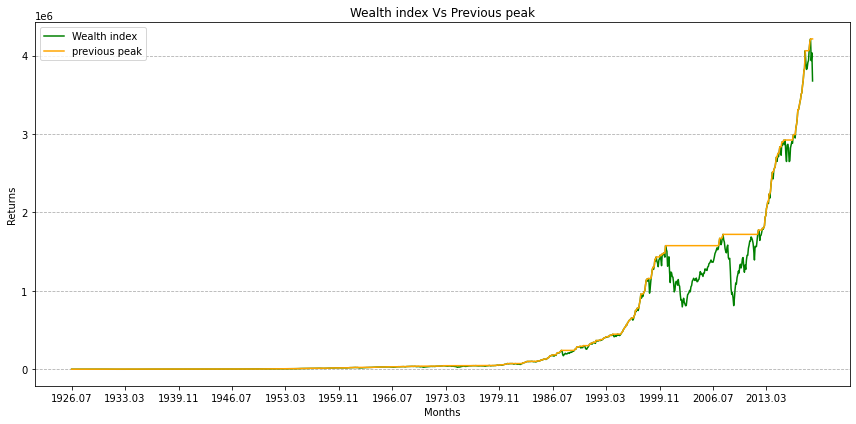

In [11]:
/Use embedpy to create visuals, getting help from beloved python.

p)import matplotlib.pyplot as plt
p)import numpy as np

/pass the month and wealth index, previous peak list to python environment
.p.set[`months;string returns`Month]
.p.set[`wealth_index;wealth_index]
.p.set[`previous_peak;previous_peak]

p)plt.figure(figsize=(12,6))
p)plt.plot(months,wealth_index, color='green',label='Wealth index');
p)plt.plot(months, previous_peak, color = 'orange', 
                label = 'previous peak');

/Titles
p)plt.title("Wealth index Vs Previous peak")
p)plt.xlabel("Months")
p)plt.ylabel("Returns")

p)selected_months = np.arange(0, len(months), 80)
p)plt.xticks(selected_months, [months[i] for i in selected_months])

p)plt.grid(axis='y', linestyle='--');
p)plt.legend();
p)plt.tight_layout();
p)plt.show();

In [12]:
/ Calculate the drawdown

/ drawdown is simply (current price - previous peak) divide by previous peak. 
/Compute it in percentage

draw_down : (wealth_index - previous_peak) % previous_peak

last draw_down

-0.1273187


It means, last price/return is 12% lesser than it's previous peak.

### Create visual for draw down


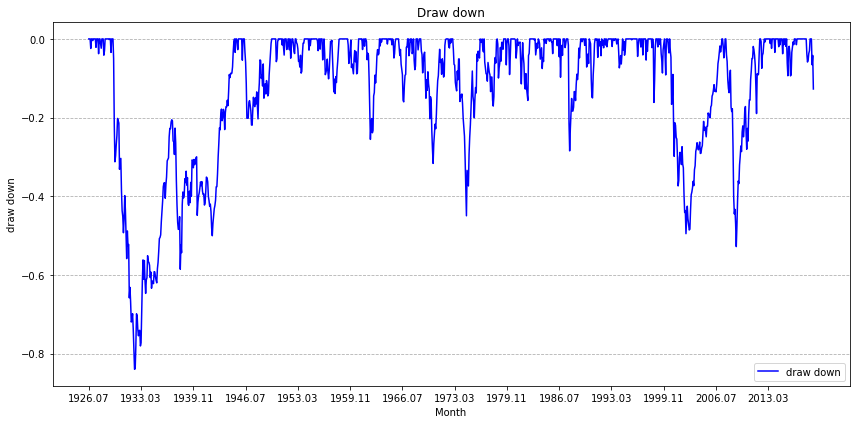

In [13]:
/pass the month and returns list to python environment
.p.set[`months;string returns`Month]
.p.set[`draw_down;draw_down]

p)plt.figure(figsize=(12,6))
p)plt.plot(months,draw_down, color='blue',label='draw down');


/Titles
p)plt.title("Draw down")
p)plt.xlabel("Month")
p)plt.ylabel("draw down")

p)selected_months = np.arange(0, len(months), 80)
p)plt.xticks(selected_months, [months[i] for i in selected_months])

p)plt.grid(axis='y', linestyle='--');
p)plt.legend();
p)plt.tight_layout();
p)plt.show();

We can see there was huge drop around 1932, yes it's Great Depression, which began in 1929 to 1932 and it's severely affected the global economy

In [14]:
/ Create a function to find the drawdown for series

drawDown: {wi: 1000*(prds ((x) + 1)); pp: maxs wi; (wi-pp) % pp};

In [15]:
update SmallCap_dd: drawDown SmallCap, 
        LargeCap_dd: drawDown LargeCap from `rets;

5#rets 

Month   SmallCap LargeCap SmallCap_dd LargeCap_dd
-------------------------------------------------
1926.07 -0.0145  0.0329   0           0          
1926.08 0.0512   0.037    0           0          
1926.09 0.0093   0.0067   0           0          
1926.10 -0.0484  -0.0243  -0.0484     -0.0243    
1926.11 -0.0078  0.027    -0.05582248 0          


In [16]:
select from rets where LargeCap_dd = min LargeCap_dd

Month   SmallCap LargeCap SmallCap_dd LargeCap_dd
-------------------------------------------------
1932.05 -0.0545  -0.2506  -0.8330008  -0.8400375 


In the summer of 1932, there was one of the largest stock market crashes in history.

In [17]:
/ Let's pull out 2008 market crash

select from rets where Month within (2008.01m; 2009.12m)

Month   SmallCap LargeCap SmallCap_dd LargeCap_dd
-------------------------------------------------
2008.01 -0.0436  -0.049   -0.2086676  -0.1036643 
2008.02 -0.0203  -0.025   -0.2247317  -0.1260727 
2008.03 -0.044   -0.0122  -0.2588435  -0.1367346 
2008.04 0.0027   0.0492   -0.2568424  -0.09426197
2008.05 0.0286   0.0161   -0.2355881  -0.07967958
2008.06 -0.0816  -0.1015  -0.2979641  -0.1730921 
2008.07 -0.0079  -0.014   -0.3035102  -0.1846688 
2008.08 0.011    0.0087   -0.2958488  -0.1775754 
2008.09 -0.1274  -0.1155  -0.3855576  -0.2725655 
2008.10 -0.2041  -0.1763  -0.5109653  -0.4008122 
2008.11 -0.165   -0.0735  -0.591656   -0.4448525 
2008.12 -0.0019  0.0205   -0.5924319  -0.433472  
2009.01 0.0175   -0.0647  -0.5852995  -0.4701263 
2009.02 -0.1107  -0.1094  -0.6312068  -0.5280945 
2009.03 0.1231   0.113    -0.5858084  -0.4747692 
2009.04 0.1973   0.1251   -0.5040884  -0.4090628 
2009.05 0.137    0.081    -0.4361485  -0.3611969 
2009.06 0.0585   -0.0103  -0.4031631  -0.3677766 


The market crash started on Sep 2008 and it was bearish til 2009 summer.